In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Distance Estimation Redone

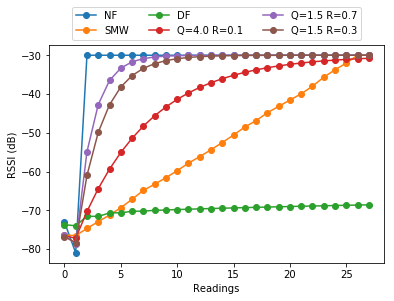

In [27]:
df = pd.read_table("distance/conv3",sep=',')
NF = df['NF'].copy()
SMW = df['SMW'].copy()
DF = df['DF'].copy()
K1 = df['K1'].copy()
K2 = df['K2'].copy()
K3 = df['K3'].copy()
plt.plot(NF, marker='o')
plt.plot(SMW, marker='o')
plt.plot(DF, marker='o')
plt.plot(K1, marker='o')
plt.plot(K2, marker='o')
plt.plot(K3, marker='o')
plt.xlabel('Readings')
plt.ylabel('RSSI (dB)')
plt.legend(['NF', 'SMW','DF','Q=4.0 R=0.1','Q=1.5 R=0.7','Q=1.5 R=0.3'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3)
plt.savefig('./pdfs/convergence.pdf',bbox_inches='tight')

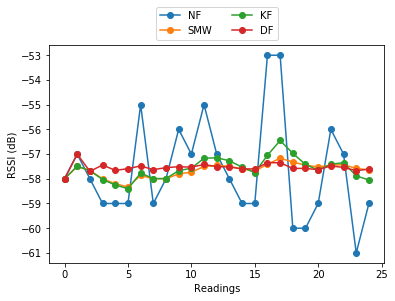

In [28]:
df = pd.read_table("distance/grafico_rssi_1m",sep=',')
NF = df['NF'].copy()
SMW = df['SMW'].copy()
KF = df['KF'].copy()
DF = df['DF'].copy()
plt.plot(NF,marker='o')
plt.plot(SMW,marker='o')
plt.plot(KF,marker='o')
plt.plot(DF,marker='o')
plt.xlabel('Readings')
plt.ylabel('RSSI (dB)')
plt.legend(loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=2)
plt.savefig('./pdfs/fluctuation.pdf',bbox_inches='tight')

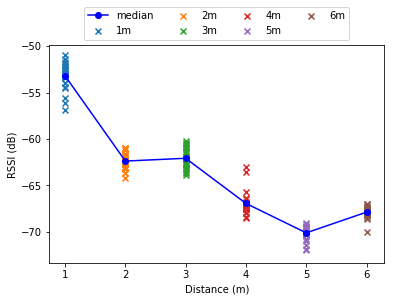

In [29]:
df = pd.read_table("distance/6m_compare",sep=',')
df2 = pd.read_table('distance/linha_media',header=None)
df2.index += 1
M1 = df['1m'].copy()
M2 = df['2m'].copy()
M3 = df['3m'].copy()
M4 = df['4m'].copy()
M5 = df['5m'].copy()
M6 = df['6m'].copy()
y = np.asarray([1]*25)
plt.scatter(x=y,y=M1,marker='x')
y+=1
plt.scatter(x=y,y=M2,marker='x')
y+=1
plt.scatter(x=y,y=M3,marker='x')
y+=1
plt.scatter(x=y,y=M4,marker='x')
y+=1
plt.scatter(x=y,y=M5,marker='x')
y+=1
plt.scatter(x=y,y=M6,marker='x')
plt.plot(df2,marker='o',color='blue')
plt.xlabel('Distance (m)')
plt.ylabel('RSSI (dB)')
plt.legend(["median","1m",'2m','3m','4m','5m','6m'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=4)
plt.savefig('./pdfs/distance.pdf',bbox_inches='tight')

# All scenarios

In [30]:
import json
def load_movement(filename):
    with open(filename) as f:
        x = json.load(f)
    return x

In [31]:
path = []
path.append(load_movement("../../../datasets/scenario1.data"))
path.append(load_movement("../../../datasets/scenario2.data"))
path.append(load_movement("../../../datasets/scenario3.data"))
path.append(load_movement("../../../datasets/scenario4.data"))
path.append(load_movement("../../../datasets/scenario5.data"))
len(path)

5

In [32]:
xxs = []
yys = []
for p in path:
    xs = []
    ys = []
    for x,y in p:
        xs.append((x*9.3)/1280)
        ys.append((y*6.82)/720)
    xxs.append(xs)
    yys.append(ys)
print(len(xxs), len(yys))

5 5


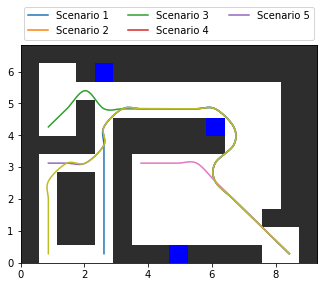

In [33]:
fig, ax = plt.subplots()
img = plt.imread('../../scenarios/room.png')
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.plot(xxs[0],yys[0], 1)
plt.plot(xxs[1],yys[1], 1)
plt.plot(xxs[2],yys[2], 1)
plt.plot(xxs[3],yys[3], 1)
plt.plot(xxs[4],yys[4], 1)
ax.legend(['Scenario 1','Scenario 2', 'Scenario 3', 'Scenario 4', 'Scenario 5'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3)
plt.savefig('./pdfs/scenarios.pdf',bbox_inches='tight')

# Scenario 1

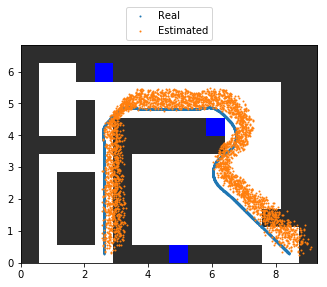

In [34]:
df = pd.read_csv("./trila_scenario1.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()
positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)
plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/trila_scenario1.pdf',bbox_inches='tight')

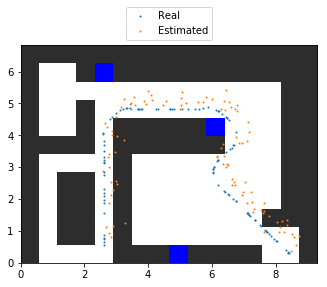

In [35]:
samples = positions.sample(100)
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(samples[' x_real'], samples[' y_real'], 1)
plt.scatter(samples[' e_x_real'], samples[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/trila_samples_scenario1.pdf',bbox_inches='tight')

In [36]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.431695
std         0.163640
min         0.009409
25%         0.315421
50%         0.430697
75%         0.545199
max         1.012907
Name:  error_real, dtype: float64

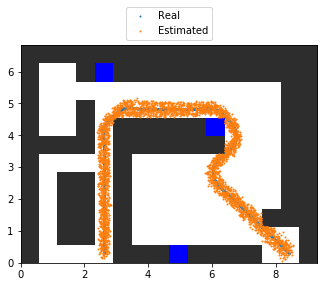

In [37]:
df = pd.read_csv("./pf_multinomial_scenario1.csv")

dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_multinonial_scenario1.pdf',bbox_inches='tight')

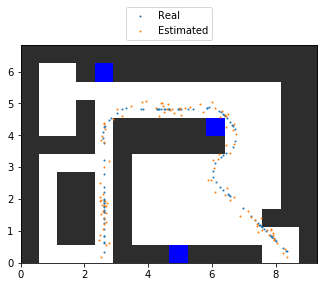

In [38]:
samples = positions.sample(100)
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(samples[' x_real'], samples[' y_real'], 1)
plt.scatter(samples[' e_x_real'], samples[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pd_multinonial_samples_scenario1.pdf',bbox_inches='tight')

In [39]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.141906
std         0.063541
min         0.001569
25%         0.096318
50%         0.140339
75%         0.182864
max         0.419805
Name:  error_real, dtype: float64

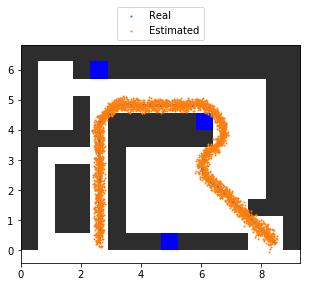

In [40]:
df = pd.read_csv("../epf_multinomial_scenario1_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_multinomial_scenario1.pdf',bbox_inches='tight')

In [41]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.129275
std         0.060209
min         0.003751
25%         0.085745
50%         0.127216
75%         0.168663
max         0.398254
Name:  error_real, dtype: float64

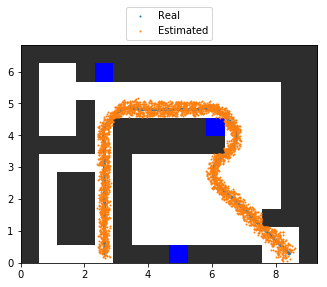

In [42]:
df = pd.read_csv("./pf_systematic_scenario1.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_systematic_scenario1.pdf',bbox_inches='tight')

In [43]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.141266
std         0.063420
min         0.000717
25%         0.096913
50%         0.139198
75%         0.183449
max         0.416061
Name:  error_real, dtype: float64

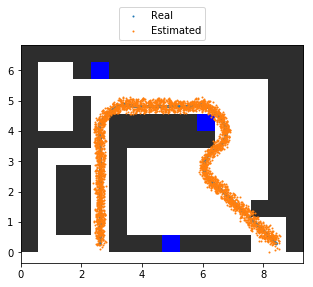

In [44]:
df = pd.read_csv("../epf_systematic_scenario1_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_systematic_scenario1.pdf',bbox_inches='tight')

In [45]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.130565
std         0.060958
min         0.001995
25%         0.085543
50%         0.127469
75%         0.169660
max         0.412927
Name:  error_real, dtype: float64

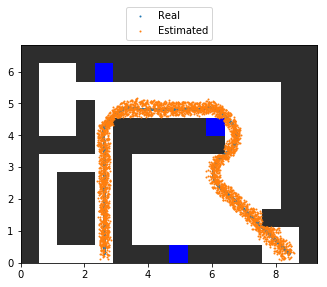

In [46]:
df = pd.read_csv("./pf_stratified_scenario1.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_stratified_scenario1.pdf',bbox_inches='tight')

In [47]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.143425
std         0.065413
min         0.003333
25%         0.094194
50%         0.141539
75%         0.186154
max         0.436052
Name:  error_real, dtype: float64

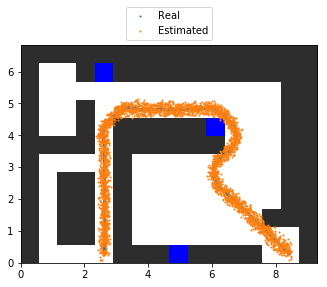

In [48]:
df = pd.read_csv("../epf_stratified_scenario1_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_stratified_scenario1.pdf',bbox_inches='tight')

In [49]:
dfReal[' error_real'].describe()

count    3306.000000
mean        0.128565
std         0.059423
min         0.001422
25%         0.085325
50%         0.124677
75%         0.167723
max         0.399220
Name:  error_real, dtype: float64

# Scenario 2

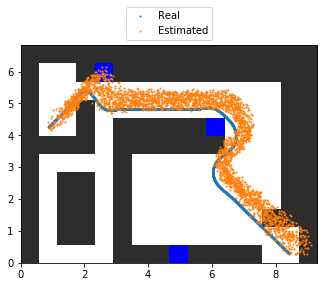

In [50]:
df = pd.read_csv("./trila_scenario2.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()
positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)
plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/trila_scenario2.pdf',bbox_inches='tight')

In [51]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.436517
std         0.173826
min         0.012141
25%         0.314028
50%         0.430412
75%         0.554669
max         1.073231
Name:  error_real, dtype: float64

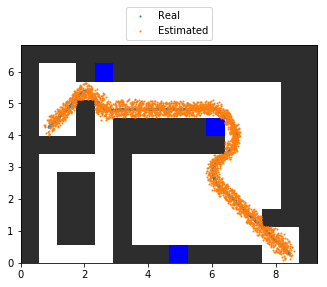

In [52]:
df = pd.read_csv("./pf_multinomial_scenario2.csv")

dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_multinomial_scenario2.pdf',bbox_inches='tight')

In [53]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.143929
std         0.064708
min         0.003021
25%         0.096194
50%         0.143608
75%         0.187596
max         0.384544
Name:  error_real, dtype: float64

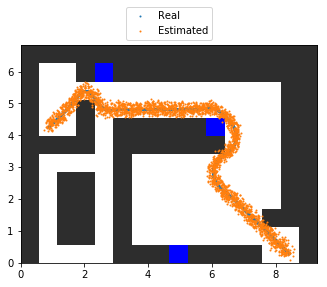

In [54]:
df = pd.read_csv("../epf_multinomial_scenario2_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_multinomial_scenario2.pdf',bbox_inches='tight')

In [55]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.129675
std         0.060817
min         0.002626
25%         0.084797
50%         0.126605
75%         0.169884
max         0.409213
Name:  error_real, dtype: float64

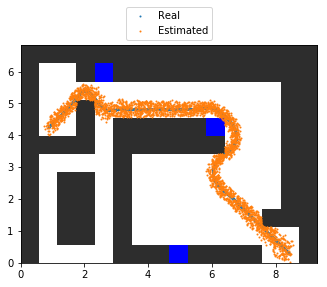

In [56]:
df = pd.read_csv("./pf_systematic_scenario2.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_systematic_scenario2.pdf',bbox_inches='tight')

In [57]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.144913
std         0.065360
min         0.001874
25%         0.098738
50%         0.141872
75%         0.186011
max         0.420219
Name:  error_real, dtype: float64

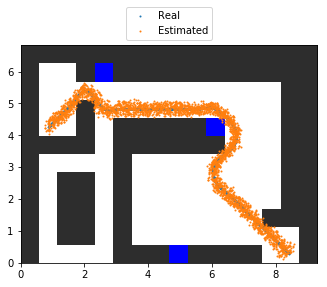

In [58]:
df = pd.read_csv("../epf_systematic_scenario2_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_systematic_scenario2.pdf',bbox_inches='tight')

In [59]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.129757
std         0.060771
min         0.001003
25%         0.084843
50%         0.125587
75%         0.170629
max         0.369605
Name:  error_real, dtype: float64

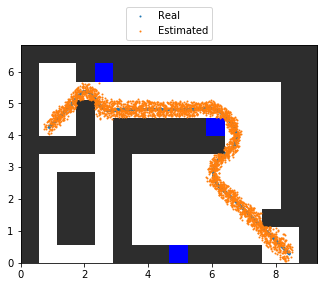

In [60]:
df = pd.read_csv("./pf_stratified_scenario2.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_stratified_scenario2.pdf',bbox_inches='tight')

In [61]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.145189
std         0.066906
min         0.004191
25%         0.095745
50%         0.143242
75%         0.189395
max         0.426310
Name:  error_real, dtype: float64

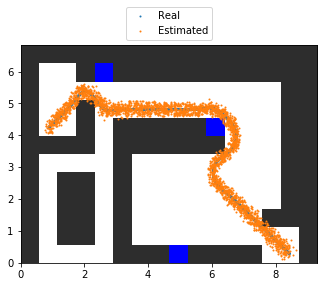

In [62]:
df = pd.read_csv("../epf_stratified_scenario2_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_stratified_scenario2.pdf',bbox_inches='tight')

In [63]:
dfReal[' error_real'].describe()

count    3028.000000
mean        0.127824
std         0.062086
min         0.002793
25%         0.082163
50%         0.125820
75%         0.169338
max         0.437546
Name:  error_real, dtype: float64

# Scenario 3

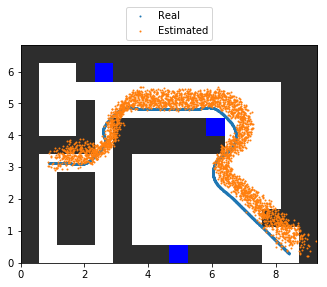

In [64]:
df = pd.read_csv("./trila_scenario3.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()
positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)
plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/trila_scenario3.pdf',bbox_inches='tight')

In [65]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.433107
std         0.169011
min         0.013899
25%         0.310590
50%         0.429920
75%         0.553944
max         0.970250
Name:  error_real, dtype: float64

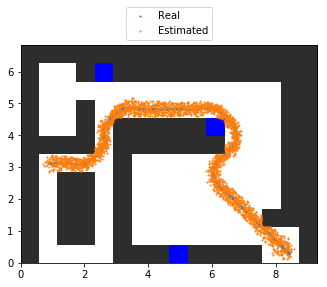

In [66]:
df = pd.read_csv("./pf_multinomial_scenario3.csv")

dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_multinomial_scenario3.pdf',bbox_inches='tight')

In [67]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.141154
std         0.062320
min         0.008066
25%         0.094963
50%         0.139829
75%         0.182972
max         0.431012
Name:  error_real, dtype: float64

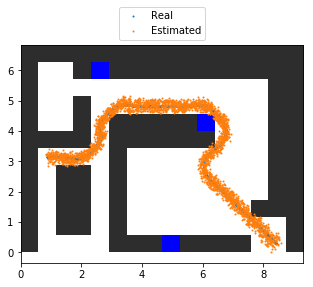

In [68]:
df = pd.read_csv("../epf_multinomial_scenario3_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_multinomial_scenario3.pdf',bbox_inches='tight')

In [69]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.129981
std         0.060609
min         0.004050
25%         0.084798
50%         0.127894
75%         0.170320
max         0.376068
Name:  error_real, dtype: float64

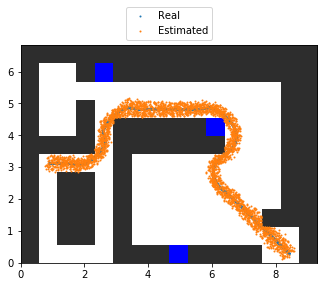

In [70]:
df = pd.read_csv("./pf_systematic_scenario3.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_systematic_scenario3.pdf',bbox_inches='tight')

In [71]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.144122
std         0.063859
min         0.004098
25%         0.096655
50%         0.142211
75%         0.185795
max         0.406003
Name:  error_real, dtype: float64

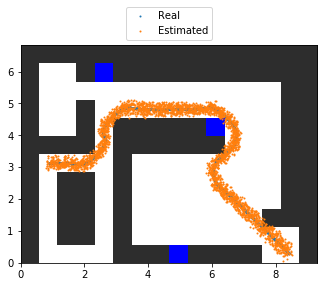

In [72]:
df = pd.read_csv("../epf_systematic_scenario3_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_systematic_scenario3.pdf',bbox_inches='tight')

In [73]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.128831
std         0.058874
min         0.004724
25%         0.084209
50%         0.125037
75%         0.168470
max         0.349959
Name:  error_real, dtype: float64

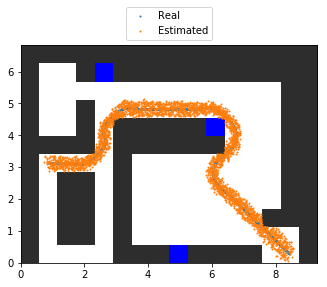

In [74]:
df = pd.read_csv("./pf_stratified_scenario3.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_stratified_scenario3.pdf',bbox_inches='tight')

In [75]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.142925
std         0.063192
min         0.002497
25%         0.097181
50%         0.142450
75%         0.183907
max         0.369770
Name:  error_real, dtype: float64

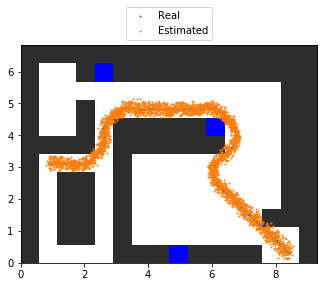

In [76]:
df = pd.read_csv("../epf_stratified_scenario3_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_stratified_scenario3.pdf',bbox_inches='tight')

In [77]:
dfReal[' error_real'].describe()

count    3110.000000
mean        0.128512
std         0.059953
min         0.001242
25%         0.083800
50%         0.127108
75%         0.168780
max         0.400314
Name:  error_real, dtype: float64

# Scenario 4 results

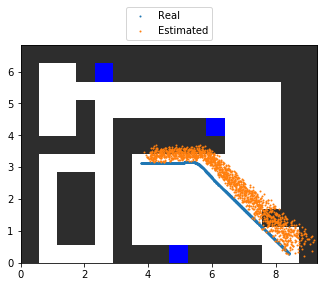

In [78]:
df = pd.read_csv("./trila_scenario4.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()
positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)
plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/trila_scenario4.pdf',bbox_inches='tight')

In [79]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.434170
std         0.143639
min         0.028654
25%         0.330140
50%         0.428878
75%         0.524892
max         0.919381
Name:  error_real, dtype: float64

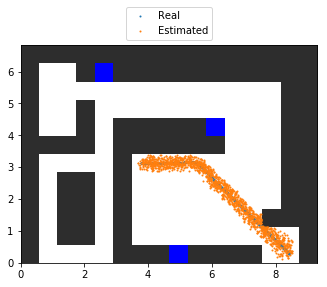

In [80]:
df = pd.read_csv("./pf_multinomial_scenario4.csv")

dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_multinomial_scenario4.pdf',bbox_inches='tight')

In [81]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.139387
std         0.064412
min         0.004784
25%         0.092356
50%         0.138098
75%         0.180503
max         0.424526
Name:  error_real, dtype: float64

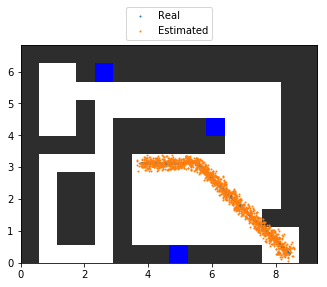

In [82]:
df = pd.read_csv("../epf_multinomial_scenario4_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_multinomial_scenario4.pdf',bbox_inches='tight')

In [83]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.129316
std         0.061790
min         0.000894
25%         0.084200
50%         0.128256
75%         0.170362
max         0.369196
Name:  error_real, dtype: float64

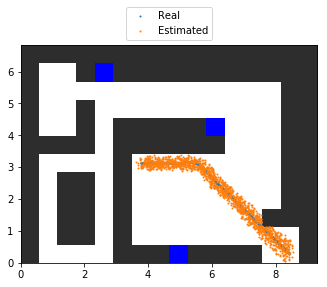

In [84]:
df = pd.read_csv("./pf_systematic_scenario4.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_systematic_scenario4.pdf',bbox_inches='tight')

In [85]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.139526
std         0.062608
min         0.002137
25%         0.095520
50%         0.138683
75%         0.179466
max         0.394504
Name:  error_real, dtype: float64

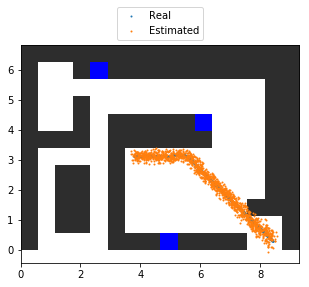

In [86]:
df = pd.read_csv("../epf_systematic_scenario4_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_systematic_scenario3.pdf',bbox_inches='tight')

In [87]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.125166
std         0.060996
min         0.003788
25%         0.081103
50%         0.121390
75%         0.163086
max         0.423249
Name:  error_real, dtype: float64

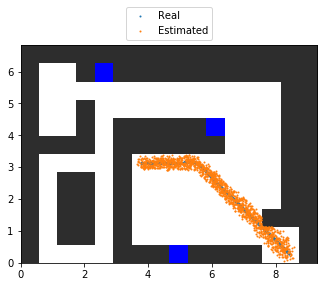

In [88]:
df = pd.read_csv("./pf_stratified_scenario4.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_stratified_scenario4.pdf',bbox_inches='tight')

In [89]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.138170
std         0.062591
min         0.005865
25%         0.093289
50%         0.135099
75%         0.177391
max         0.434230
Name:  error_real, dtype: float64

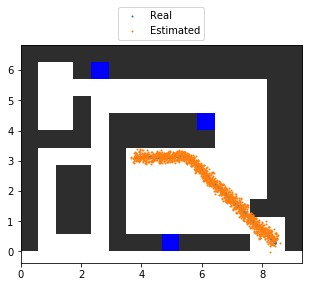

In [90]:
df = pd.read_csv("../epf_stratified_scenario4_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_stratified_scenario4.pdf',bbox_inches='tight')

In [91]:
dfReal[' error_real'].describe()

count    1481.000000
mean        0.124875
std         0.057594
min         0.002473
25%         0.083390
50%         0.122699
75%         0.161607
max         0.414704
Name:  error_real, dtype: float64

# Scenario 5 results

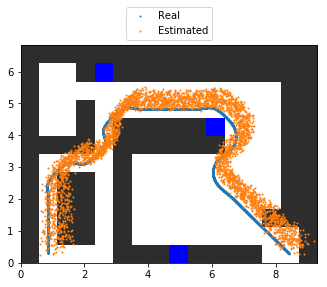

In [92]:
df = pd.read_csv("./trila_scenario5.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()
positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)
plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/trila_scenario5.pdf',bbox_inches='tight')

In [93]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.436193
std         0.183619
min         0.005099
25%         0.302286
50%         0.433512
75%         0.560078
max         1.104313
Name:  error_real, dtype: float64

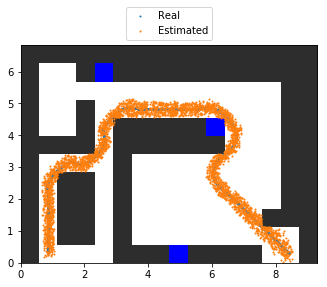

In [94]:
df = pd.read_csv("./pf_multinomial_scenario5.csv")

dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_multinomial_scenario5.pdf',bbox_inches='tight')

In [95]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.142506
std         0.063198
min         0.001306
25%         0.097727
50%         0.142173
75%         0.184719
max         0.448033
Name:  error_real, dtype: float64

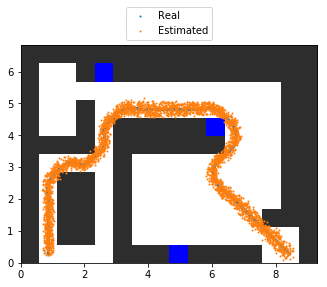

In [96]:
df = pd.read_csv("../epf_multinomial_scenario5_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_multinomial_scenario5.pdf',bbox_inches='tight')

In [97]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.128212
std         0.061112
min         0.004443
25%         0.081608
50%         0.125120
75%         0.168734
max         0.380361
Name:  error_real, dtype: float64

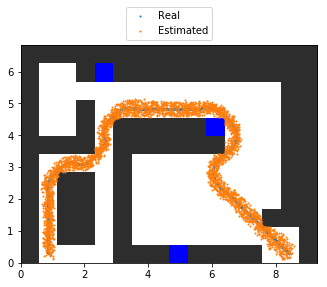

In [98]:
df = pd.read_csv("./pf_systematic_scenario5.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_systematic_scenario5.pdf',bbox_inches='tight')

In [99]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.144751
std         0.064785
min         0.001667
25%         0.096928
50%         0.143708
75%         0.187641
max         0.361099
Name:  error_real, dtype: float64

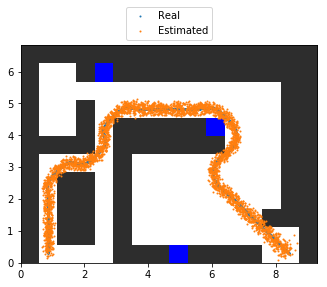

In [100]:
df = pd.read_csv("../epf_systematic_scenario5_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_systematic_scenario5.pdf',bbox_inches='tight')

In [101]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.127544
std         0.059790
min         0.004242
25%         0.083847
50%         0.125898
75%         0.166721
max         0.596693
Name:  error_real, dtype: float64

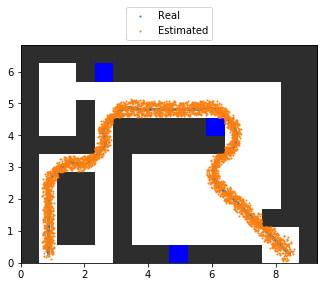

In [102]:
df = pd.read_csv("./pf_stratified_scenario5.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/pf_stratified_scenario5.pdf',bbox_inches='tight')

In [103]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.144171
std         0.062822
min         0.004800
25%         0.099257
50%         0.143561
75%         0.185873
max         0.418261
Name:  error_real, dtype: float64

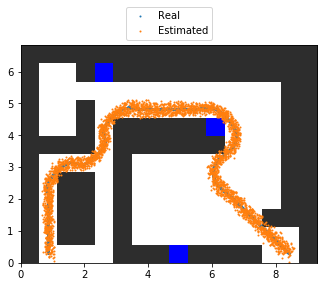

In [104]:
df = pd.read_csv("../epf_stratified_scenario5_1gen.csv")
dfReal = df[[' x_real',' y_real',' e_x_real',' e_y_real',' error_real']].copy()

positions = dfReal[[' x_real', ' y_real', ' e_x_real', ' e_y_real']].copy()
fig, ax = plt.subplots()
ax.imshow(img, extent=[0,9.3,0,6.82])
plt.scatter(positions[' x_real'], positions[' y_real'], 1)

plt.scatter(positions[' e_x_real'], positions[' e_y_real'], 1)
plt.legend(['Real', 'Estimated'],loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=1)
plt.savefig('./pdfs/epf_stratified_scenario5.pdf',bbox_inches='tight')

In [105]:
dfReal[' error_real'].describe()

count    3636.000000
mean        0.128812
std         0.059688
min         0.003825
25%         0.085274
50%         0.126072
75%         0.168855
max         0.400963
Name:  error_real, dtype: float64

# Fitness

In [106]:
import math
def gaussian_kernel(x, sigma):
    # http://www.stat.wisc.edu/~mchung/teaching/MIA/reading/diffusion.gaussian.kernel.pdf.pdf
    g = (math.e ** -(x ** 2 / (2 * sigma **2))) * (1 / math.sqrt(math.pi * 2) * sigma)
    # g = (math.e ** -(x ** 2 / (2 * sigma **2)))
    return g

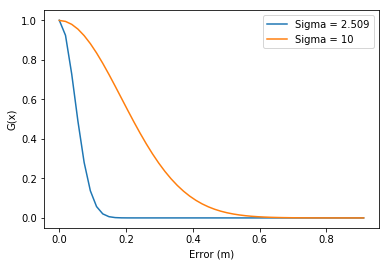

In [107]:
x = []
y = []
for i in range(0, 50):
    x.append(i)
    y.append(gaussian_kernel(i,2.509))
x = np.asarray(x)
x = (x*9.3)/500
plt.plot(x,y)
x = []
y = []
for i in range(0, 50):
    x.append(i)
    y.append(gaussian_kernel(i,10))
x = np.asarray(x)
x = (x*9.3)/500
y = np.asarray(y)
y = (y - y.min())/(y.max() - y.min())
plt.plot(x,y)
plt.ylabel('G(x)')
plt.xlabel('Error (m)')
plt.legend(['Sigma = 2.509', 'Sigma = 10'])
plt.savefig('./pdfs/fitness.pdf',bbox_inches='tight')